In [8]:
import polars as pl
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [9]:
file = pl.read_csv("../../data/preprocessedData.csv")
file.head(3)

temp,feelsLike,pressure,humidity,clouds,windSpeed,windDir,gustSpeed,result
f64,f64,f64,f64,f64,f64,f64,f64,i64
35.6,36.9,978.0,35.0,100.0,3.05,220.0,4.0,1
34.4,35.3,979.0,37.0,100.0,0.78,144.0,2.0,1
33.3,34.8,981.0,42.0,100.0,2.02,78.0,2.02,1


In [10]:
x = file.drop("result")
y = file['result']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
svm_classifier = SVC(kernel="linear", C=1.0, random_state=99)

svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=99)

In [14]:
y_pred = svm_classifier.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f"accuracy: {accuracy}")
print(f"\nconfusion matrix:\n   {confusion_matrix}")
print(f"\nclassification report:\n    {classification_report}")

accuracy: 0.7290419161676647

confusion matrix:
   [[465 210]
 [152 509]]

classification report:
                  precision    recall  f1-score   support

           0       0.75      0.69      0.72       675
           1       0.71      0.77      0.74       661

    accuracy                           0.73      1336
   macro avg       0.73      0.73      0.73      1336
weighted avg       0.73      0.73      0.73      1336



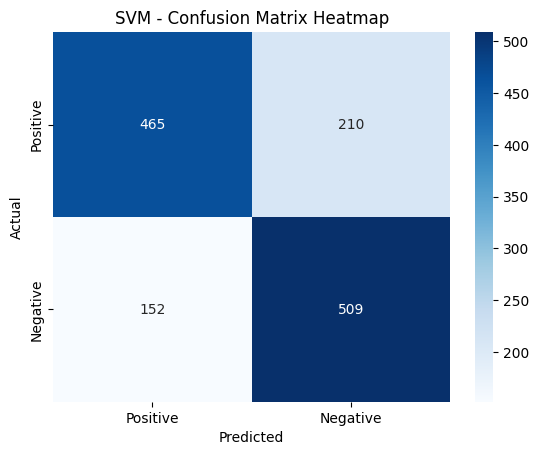

In [19]:
labels = ['Positive', 'Negative']
confusion_df = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix Heatmap")
plt.savefig("./report_images/confusion_matrix_heatmap.png")
plt.show()

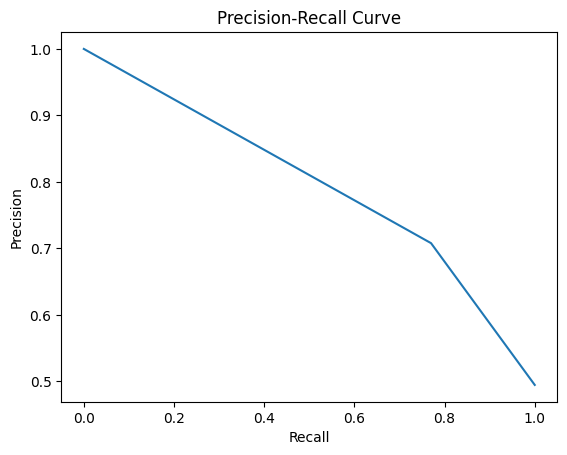

In [17]:
# **Precision-Recall Curve**: This plot is useful in imbalanced datasets to understand the trade-off between precision and recall for different threshold.

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig("./report_images/precision_recall_curve.png")
plt.show()

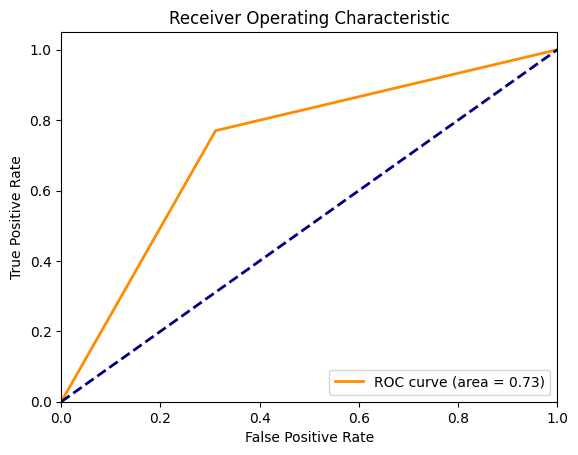

In [18]:
# **ROC Curve**: It's a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("./report_images/roc_curve.png")
plt.show()

In [10]:
classification_dict = {
  "original": y_test, 
  "predicted": y_pred
}

prediction_df = pl.DataFrame(classification_dict)

prediction_df.write_csv("classification_report.csv")

In [11]:
with open("model.pickle", 'wb') as file:
  pickle.dump(svm_classifier, file)